# Distribution of Top Ranking Games in Steam Canada

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

### SQL Code:
SELECT title

FROM `country_top_sellers.Canada_top_sellers` 

GROUP BY title

HAVING COUNT(date_scraped) = _any number from 1-15_;

In [2]:
#number of times game is in ranking
ranked_1 = pd.read_csv("ranking_once.csv")
ranked_2 = pd.read_csv("ranking_twice.csv")
ranked_3 = pd.read_csv("ranking_three.csv")
ranked_4 = pd.read_csv("ranking_four.csv")
ranked_5 = pd.read_csv("ranking_five.csv")
ranked_6 = pd.read_csv("ranking_six.csv")
ranked_7 = pd.read_csv("ranking_seven.csv")
ranked_8 = pd.read_csv("ranking_eight.csv")
ranked_9 = pd.read_csv("ranking_nine.csv")
ranked_10 = pd.read_csv("ranking_ten.csv")
ranked_11 = pd.read_csv("ranking_eleven.csv")
ranked_12 = pd.read_csv("ranking_twelve.csv")
ranked_13 = pd.read_csv("ranking_thirteen.csv")
ranked_14 = pd.read_csv("ranking_fourteen.csv")
ranked_15 = pd.read_csv("ranking_fifteen.csv")
all_games = pd.read_csv("ranking_canada.csv")

In [233]:
lst = [ranked_1,  ranked_2, ranked_3, ranked_4, ranked_5, ranked_6, ranked_7, ranked_8, ranked_9, 
          ranked_10, ranked_11, ranked_12, ranked_13, ranked_14, ranked_15]

count = 1
avg_ranks = []
avg_prices = []
for i in lst:
    temp = i.merge(all_games, how='inner', on='title')
    avg_rank = temp["rank_no"].values.mean()
    avg_price = temp["price"].values.mean()
    print(f"The Average Rank for dataframe {count} is {avg_rank}")
    print(f"The Average Price for dataframe {count} is {avg_price}")
    avg_ranks.append(avg_rank)
    avg_prices.append(avg_price)
    count += 1

The Average Rank for dataframe 1 is 4881.45969222081
The Average Price for dataframe 1 is 9.065276012988845
The Average Rank for dataframe 2 is 4835.219977298524
The Average Price for dataframe 2 is 9.61322247446084
The Average Rank for dataframe 3 is 4695.155832974602
The Average Price for dataframe 3 is 10.075029415985078
The Average Rank for dataframe 4 is 4558.514178240741
The Average Price for dataframe 4 is 10.252918113425926
The Average Rank for dataframe 5 is 4429.020471161657
The Average Price for dataframe 5 is 11.21905605199025
The Average Rank for dataframe 6 is 4268.089833333333
The Average Price for dataframe 6 is 11.272041666666667
The Average Rank for dataframe 7 is 4270.39661876585
The Average Price for dataframe 7 is 10.66803888419273
The Average Rank for dataframe 8 is 3993.2991803278687
The Average Price for dataframe 8 is 12.888818926974663
The Average Rank for dataframe 9 is 3926.0593329648054
The Average Price for dataframe 9 is 13.002677353970887
The Average Ran

In [234]:
data = {'appeared': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'avg_ranks': avg_ranks,
        'avg_prices': avg_prices}

df = pd.DataFrame(data)

In [235]:
df

,appeared,avg_ranks,avg_prices
0,1,4881.459692,9.065276
1,2,4835.219977,9.613222
2,3,4695.155833,10.075029
3,4,4558.514178,10.252918
4,5,4429.020471,11.219056
5,6,4268.089833,11.272042
6,7,4270.396619,10.668039
7,8,3993.299180,12.888819
8,9,3926.059333,13.002677
9,10,3937.732473,11.763598


Text(0.5, 1.0, "Average Price of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

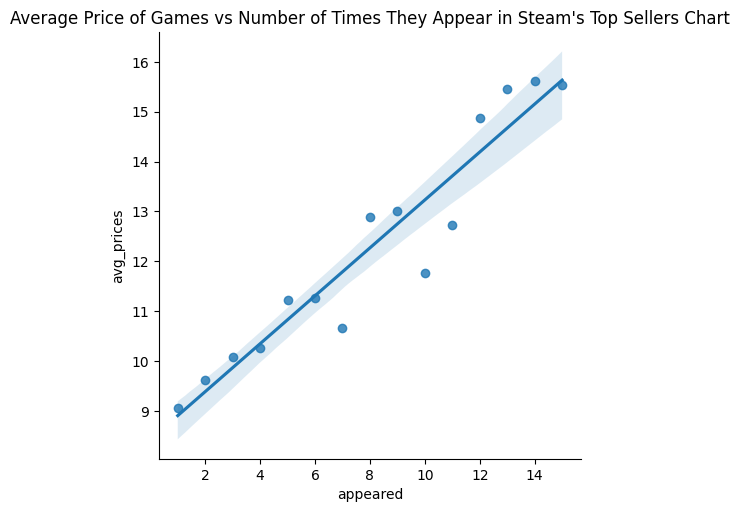

In [236]:
scatter = sns.lmplot(data=df, x="appeared", y="avg_prices")
plt.title("Average Price of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

Text(0.5, 1.0, "Average Rank of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

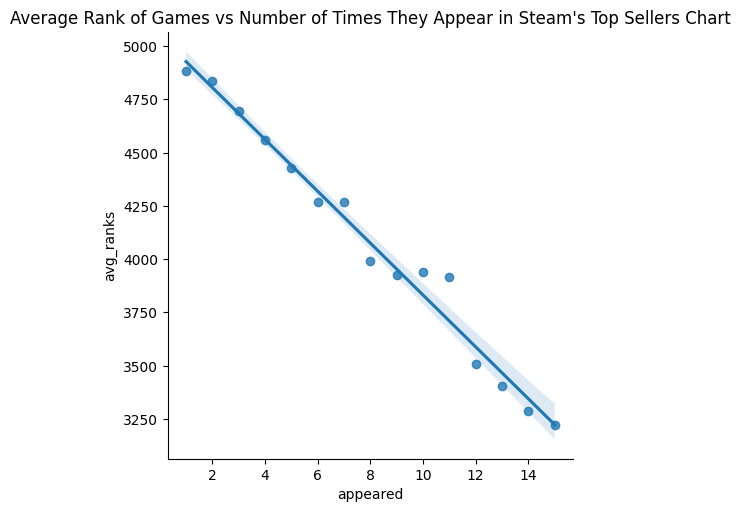

In [237]:
scatter = sns.lmplot(data=df, x="appeared", y="avg_ranks")
plt.title("Average Rank of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

In [238]:
top_200 = all_games.groupby("title").agg("mean").sort_values("rank_no").head(200)
top_200

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_61458/2979396985.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_200 = all_games.groupby("title").agg("mean").sort_values("rank_no").head(200)


,rank_no,price,appid,bundleid
title,,,,
Counter-Strike: Global Offensive,1.090909,18.990000,730.0,NaN
Steam Deck,3.333333,499.000000,1675200.0,NaN
Destiny 2,4.818182,0.000000,1085660.0,NaN
Lost Ark,7.318182,0.000000,1599340.0,NaN
DREDGE,10.000000,32.500000,1562430.0,NaN
...,...,...,...,...
The Forest,235.714286,22.790000,242760.0,NaN
Space Engineers,235.761905,22.790000,244850.0,NaN
Barotrauma,237.636364,46.580909,602960.0,NaN


(-10.0, 170.0)

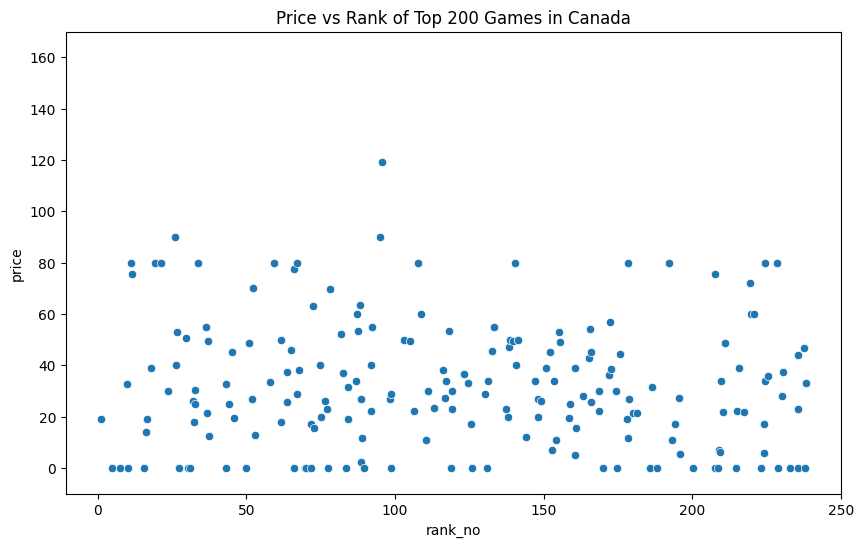

In [239]:
scatter = sns.scatterplot(data=top_200, x="rank_no", y="price")
plt.title("Price vs Rank of Top 200 Games in Canada")
plt.ylim(-10, 170)

(-10.0, 170.0)

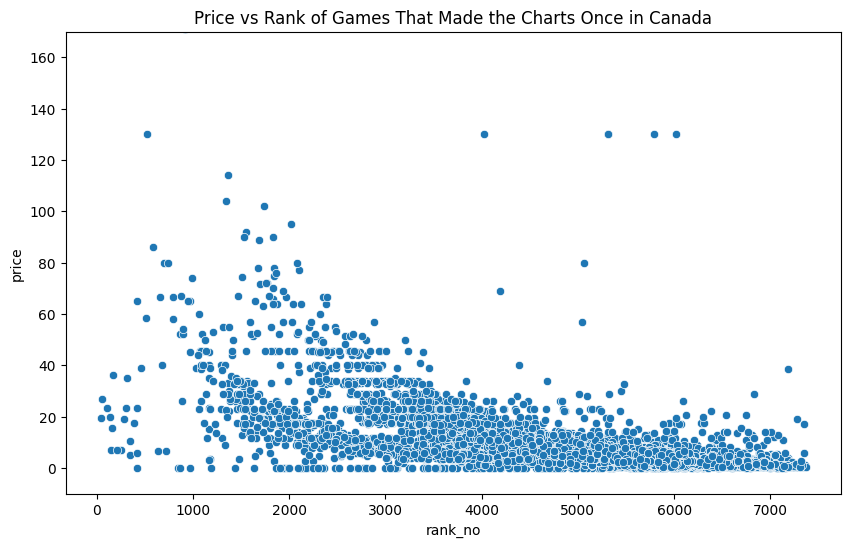

In [240]:
once = ranked_1.merge(all_games, how='inner', on='title')
scatter = sns.scatterplot(data=once, x="rank_no", y="price", alpha = 1)
plt.title("Price vs Rank of Games That Made the Charts Once in Canada")
plt.ylim(-10, 170)

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_61458/2011409673.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fifteen = ranked_15.merge(all_games, how='inner', on='title').groupby("title").mean()


(-10.0, 170.0)

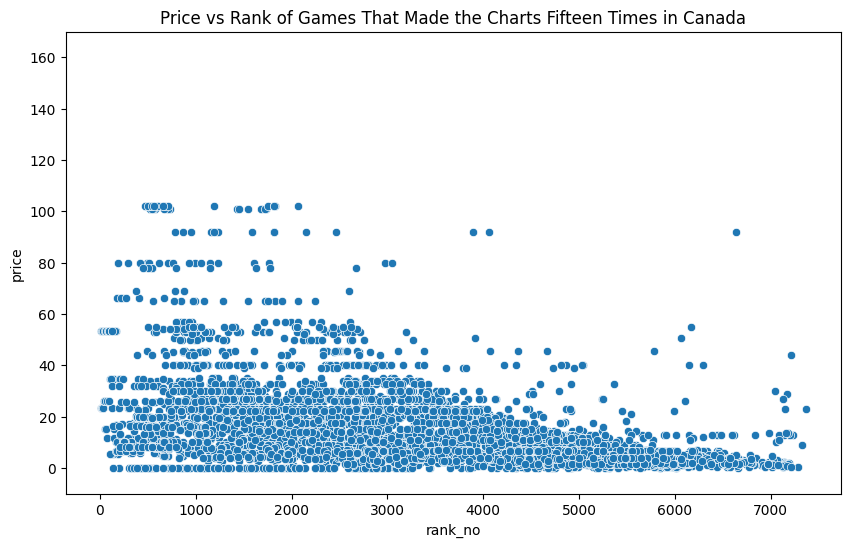

In [241]:
fifteen = ranked_15.merge(all_games, how='inner', on='title').groupby("title").mean()
scatter = sns.scatterplot(data=ranked_15.merge(all_games, how='inner', on='title'), x="rank_no", y="price", alpha = 1)
plt.title("Price vs Rank of Games That Made the Charts Fifteen Times in Canada")
plt.ylim(-10, 170)

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_61458/2949525371.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  five = ranked_5.merge(all_games, how='inner', on='title').groupby("title").mean()
/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_61458/2949525371.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seven = ranked_7.merge(all_games, how='inner', on='title').groupby("title").mean()
/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_61458/2949525371.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, n

Text(0.5, 1.0, 'Price vs Rank: Fifteen')

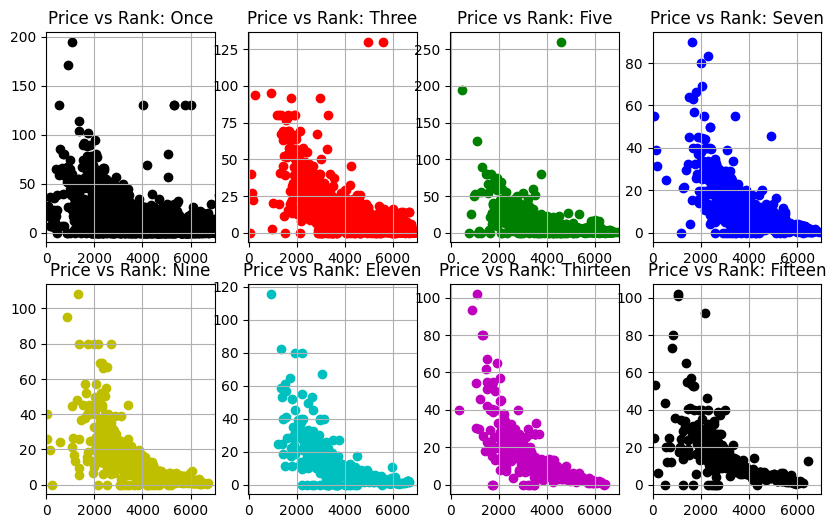

In [242]:
## three = ranked_3.merge(all_games, how='inner', on='title').groupby("title").mean()
five = ranked_5.merge(all_games, how='inner', on='title').groupby("title").mean()
seven = ranked_7.merge(all_games, how='inner', on='title').groupby("title").mean()
nine = ranked_9.merge(all_games, how='inner', on='title').groupby("title").mean()
eleven = ranked_11.merge(all_games, how='inner', on='title').groupby("title").mean()
thirteen = ranked_13.merge(all_games, how='inner', on='title').groupby("title").mean()


plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,4,1)
plt.scatter(once["rank_no"],once["price"], c="k")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Once")

plt.subplot(2,4,2)
plt.scatter(three["rank_no"],three["price"], c="r")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Three")


plt.subplot(2,4,3)
plt.scatter(five["rank_no"],five["price"] ,c="g")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Five")


plt.subplot(2,4,4)
plt.scatter(seven["rank_no"],seven["price"], c="b")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Seven")


plt.subplot(2,4,5)
plt.scatter(nine["rank_no"],nine["price"], c="y")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Nine")

plt.subplot(2,4,6)
plt.scatter(eleven["rank_no"],eleven["price"], c="c")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Eleven")

plt.subplot(2,4,7)
plt.scatter(thirteen["rank_no"],thirteen["price"], c="m")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Thirteen")

plt.subplot(2,4,8)
plt.scatter(fifteen["rank_no"],fifteen["price"], c="k")
plt.grid()
plt.xlim(-10, 7000)
plt.title("Price vs Rank: Fifteen")

# Bonus: Compare with Japan's Market

In [243]:
#number of times game is in ranking
jp_1 = pd.read_csv("jp_1.csv")
jp_2 = pd.read_csv("jp_2.csv")
jp_3 = pd.read_csv("jp_3.csv")
jp_4 = pd.read_csv("jp_4.csv")
jp_5 = pd.read_csv("jp_5.csv")
jp_6 = pd.read_csv("jp_6.csv")
jp_7 = pd.read_csv("jp_7.csv")
jp_8 = pd.read_csv("jp_8.csv")
jp_9 = pd.read_csv("jp_9.csv")
jp_10 = pd.read_csv("jp_10.csv")
jp_11 = pd.read_csv("jp_11.csv")
jp_12 = pd.read_csv("jp_12.csv")
jp_13 = pd.read_csv("jp_13.csv")
jp_14 = pd.read_csv("jp_14.csv")
jp_15 = pd.read_csv("jp_15.csv")
all_jp_games = pd.read_csv("ranking_japan.csv")

In [244]:
lst = [jp_1, jp_2, jp_3, jp_4, jp_5, jp_6, jp_7, jp_8, jp_9, jp_10, jp_11, jp_12, jp_13, jp_14, jp_15]

count = 1
avg_jp_ranks = []
avg_jp_prices = []
for i in lst:
    temp = i.merge(all_jp_games, how='inner', on='title')
    avg_jp_rank = temp["rank_no"].values.mean()
    avg_jp_price = temp["price"].values.mean()
    print(f"The Average Rank for dataframe {count} is {avg_jp_rank}")
    print(f"The Average Price for dataframe {count} is {avg_jp_price}")
    avg_jp_ranks.append(avg_jp_rank)
    avg_jp_prices.append(avg_jp_price)
    count += 1

The Average Rank for dataframe 1 is 3465.6469062615784
The Average Price for dataframe 1 is 902.3782882549092
The Average Rank for dataframe 2 is 3452.3989088575095
The Average Price for dataframe 2 is 811.8510911424904
The Average Rank for dataframe 3 is 3323.0557108254147
The Average Price for dataframe 3 is 959.3836407676541
The Average Rank for dataframe 4 is 3223.717777777778
The Average Price for dataframe 4 is 973.076
The Average Rank for dataframe 5 is 3112.74099883856
The Average Price for dataframe 5 is 1056.239256678281
The Average Rank for dataframe 6 is 3009.5212609970677
The Average Price for dataframe 6 is 1064.0432551319648
The Average Rank for dataframe 7 is 2933.7277628032343
The Average Price for dataframe 7 is 1093.7998652291105
The Average Rank for dataframe 8 is 2927.7284798534797
The Average Price for dataframe 8 is 1020.2664835164835
The Average Rank for dataframe 9 is 2721.810185185185
The Average Price for dataframe 9 is 1213.917211328976
The Average Rank for 

In [245]:
jp_data = {'appeared': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'avg_jp_ranks': avg_jp_ranks,
        'avg_jp_prices': avg_jp_prices}

jp = pd.DataFrame(jp_data)
jp

,appeared,avg_jp_ranks,avg_jp_prices
0,1,3465.646906,902.378288
1,2,3452.398909,811.851091
2,3,3323.055711,959.383641
3,4,3223.717778,973.076000
4,5,3112.740999,1056.239257
5,6,3009.521261,1064.043255
6,7,2933.727763,1093.799865
7,8,2927.728480,1020.266484
8,9,2721.810185,1213.917211
9,10,2767.869444,1148.365152


In [246]:
canada = df
canada

,appeared,avg_ranks,avg_prices
0,1,4881.459692,9.065276
1,2,4835.219977,9.613222
2,3,4695.155833,10.075029
3,4,4558.514178,10.252918
4,5,4429.020471,11.219056
5,6,4268.089833,11.272042
6,7,4270.396619,10.668039
7,8,3993.299180,12.888819
8,9,3926.059333,13.002677
9,10,3937.732473,11.763598


In [247]:
jp["avg_ca_ranks"] = canada["avg_ranks"]
jp["avg_ca_prices"] = canada["avg_prices"]
jp

,appeared,avg_jp_ranks,avg_jp_prices,avg_ca_ranks,avg_ca_prices
0,1,3465.646906,902.378288,4881.459692,9.065276
1,2,3452.398909,811.851091,4835.219977,9.613222
2,3,3323.055711,959.383641,4695.155833,10.075029
3,4,3223.717778,973.076000,4558.514178,10.252918
4,5,3112.740999,1056.239257,4429.020471,11.219056
5,6,3009.521261,1064.043255,4268.089833,11.272042
6,7,2933.727763,1093.799865,4270.396619,10.668039
7,8,2927.728480,1020.266484,3993.299180,12.888819
8,9,2721.810185,1213.917211,3926.059333,13.002677
9,10,2767.869444,1148.365152,3937.732473,11.763598


Text(0.5, 1.0, "Average Price of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

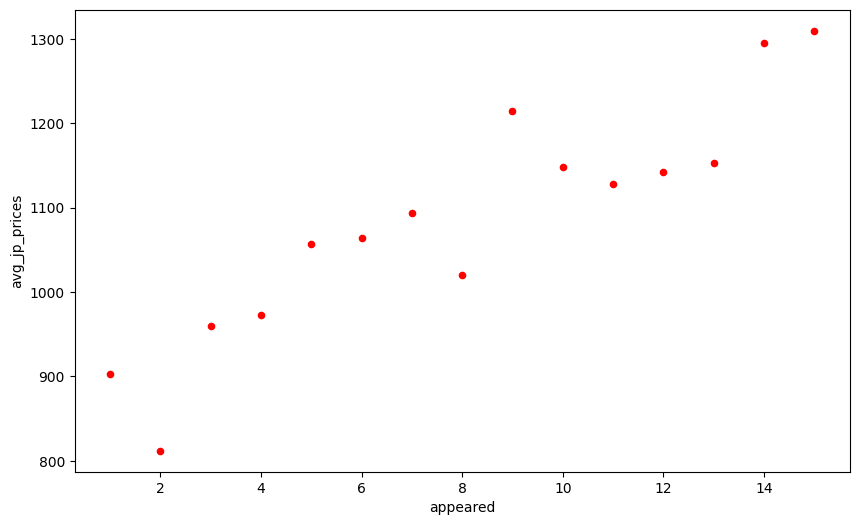

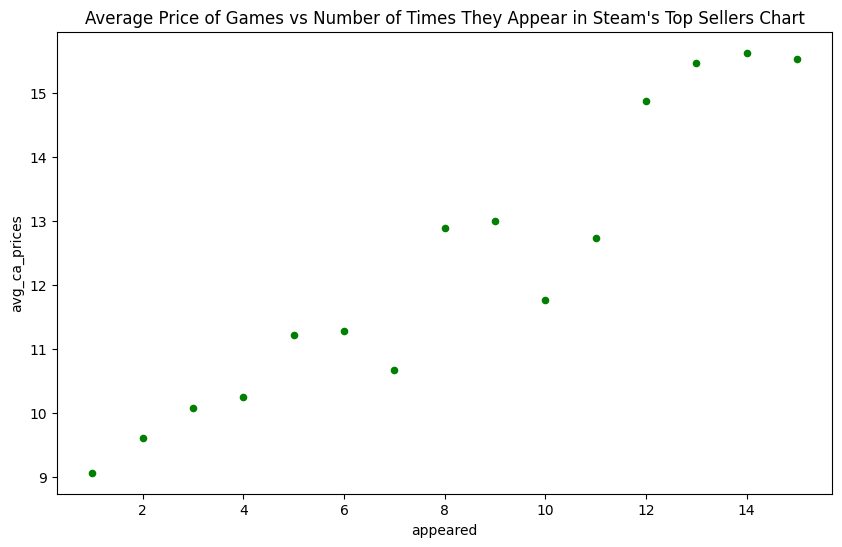

In [253]:
scatter_jp = jp.plot(kind='scatter', x='appeared', y='avg_jp_prices', color='r')    
scatter_ca = jp.plot(kind='scatter', x='appeared', y='avg_ca_prices', color='g')
plt.title("Average Price of Games vs Number of Times They Appear in Steam's Top Sellers Chart")

Text(0.5, 1.0, 'CA: Ranks vs times appeared')

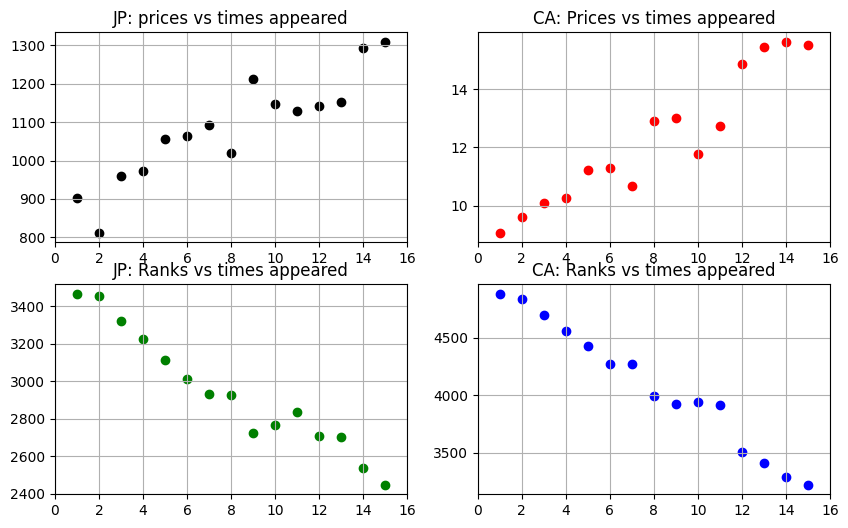

In [258]:
plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,2,1)
plt.scatter(jp["appeared"],jp["avg_jp_prices"], c="k")
plt.grid()
plt.xlim(0, 16)
plt.title("JP: prices vs times appeared")

plt.subplot(2,2,2)
plt.scatter(jp["appeared"],jp["avg_ca_prices"], c="r")
plt.grid()
plt.xlim(0, 16)
plt.title("CA: Prices vs times appeared")


plt.subplot(2,2,3)
plt.scatter(jp["appeared"],jp["avg_jp_ranks"] ,c="g")
plt.grid()
plt.xlim(0, 16)
plt.title("JP: Ranks vs times appeared")


plt.subplot(2,2,4)
plt.scatter(jp["appeared"],jp["avg_ca_ranks"], c="b")
plt.grid()
plt.xlim(0, 16)
plt.title("CA: Ranks vs times appeared")